# *Analysis 4: Clubs*

We started with Competitions and then moved on to matches played by teams, without ever delving into their structure. Now it is time to analyze them. Let's examine the structure of the dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/clubs.csv')

df.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...


Understand the composition of the dataset and what each column represents:
- **club_id:** Unique identifier of the **club**.
- **club_code:** Abbreviated code of the **club**.
- **name:** Full name of the **club**.
- **domestic_competition_id:** Identifier of the **competition** the club participates in.
- **total_market_value:** **Total market value** of the team.
- **squad_size:** **Size** of the squad (number of players).
- **average_age:** **Average age** of the team players.
- **foreigners_number:** Number of **foreign players** in the team.
- **foreigners_percentage:** Percentage of **foreign players** in the team.
- **national_team_players:** Number of players who are part of the **national team**.
- **stadium_name:** Name of the club's **home stadium**.
- **stadium_seats:** Number of **seats** in the stadium.
- **net_transfer_record:** **Net balance** of the club's transfer expenses.
- **coach_name:** Name of the **coach** of the club.
- **last_season:** Latest **season** for reference data.
- **url:** **URL** of the club's Transfermarkt page.


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (426, 16)


It is inferred from the number of rows that this dataset is used to store __static__ data.


Let's proceed with handling __any null values__.


In [4]:
df.isnull().sum()

club_id                      0
club_code                    0
name                         0
domestic_competition_id      0
total_market_value         426
squad_size                   0
average_age                 38
foreigners_number            0
foreigners_percentage       47
national_team_players        0
stadium_name                 0
stadium_seats                0
net_transfer_record          0
coach_name                 426
last_season                  0
url                          0
dtype: int64

Use the __types__ command to view the data types of the columns, so we can make __correct substitutions__.

In [5]:
df.dtypes

club_id                      int64
club_code                   object
name                        object
domestic_competition_id     object
total_market_value         float64
squad_size                   int64
average_age                float64
foreigners_number            int64
foreigners_percentage      float64
national_team_players        int64
stadium_name                object
stadium_seats                int64
net_transfer_record         object
coach_name                 float64
last_season                  int64
url                         object
dtype: object

In [6]:
df['total_market_value'] = df['total_market_value'].fillna('unknown')
df['coach_name'] = df['coach_name'].fillna('unknown')
df['average_age'] = df['average_age'].fillna(-1)
df['foreigners_percentage'] = df['foreigners_percentage'].fillna('unknown')

df.isnull().sum()

club_id                    0
club_code                  0
name                       0
domestic_competition_id    0
total_market_value         0
squad_size                 0
average_age                0
foreigners_number          0
foreigners_percentage      0
national_team_players      0
stadium_name               0
stadium_seats              0
net_transfer_record        0
coach_name                 0
last_season                0
url                        0
dtype: int64

Now that we have handled the null values, we can proceed with the __removal__ of the __URL__ column, which is __useless__ for the analysis.


In [7]:
df = df.drop('url', axis=1)
if 'url' in df.columns:
    print("La colonna 'url' è presente nel DataFrame.")
else:
    print("La colonna 'url' non è presente nel DataFrame.")

La colonna 'url' non è presente nel DataFrame.


Begin the data analysis with a __histogram__ to visualize the distribution of the __average age__ of the teams. 
Ignore teams with a negative __average age__, given the null values were cleaned previously.


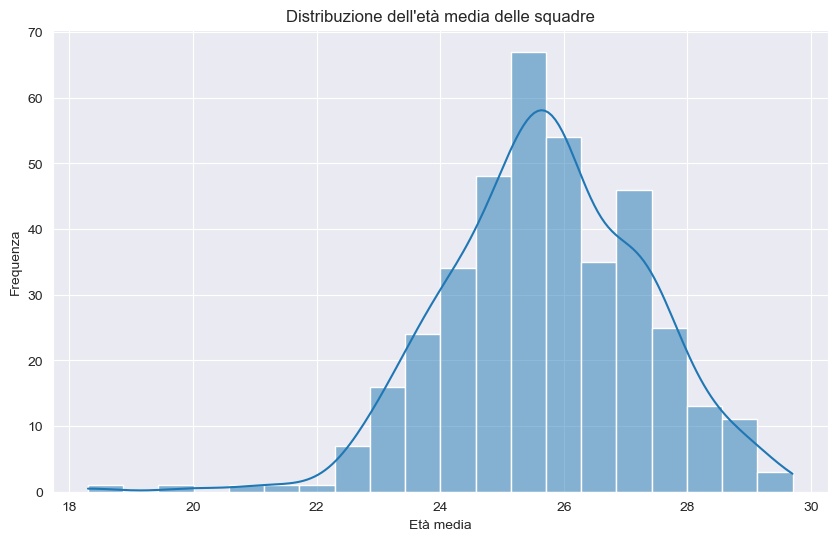

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['average_age'] != -1]['average_age'].dropna(), bins=20, kde=True) 
plt.title('Distribuzione dell\'età media delle squadre')
plt.xlabel('Età media')
plt.ylabel('Frequenza')
plt.show()

A more detailed analysis of the average age of teams can be performed by breaking down the data by __competition__.
Use a __box plot__ to visualize the __median__, quartiles, minimum and maximum values, and any potential outliers.


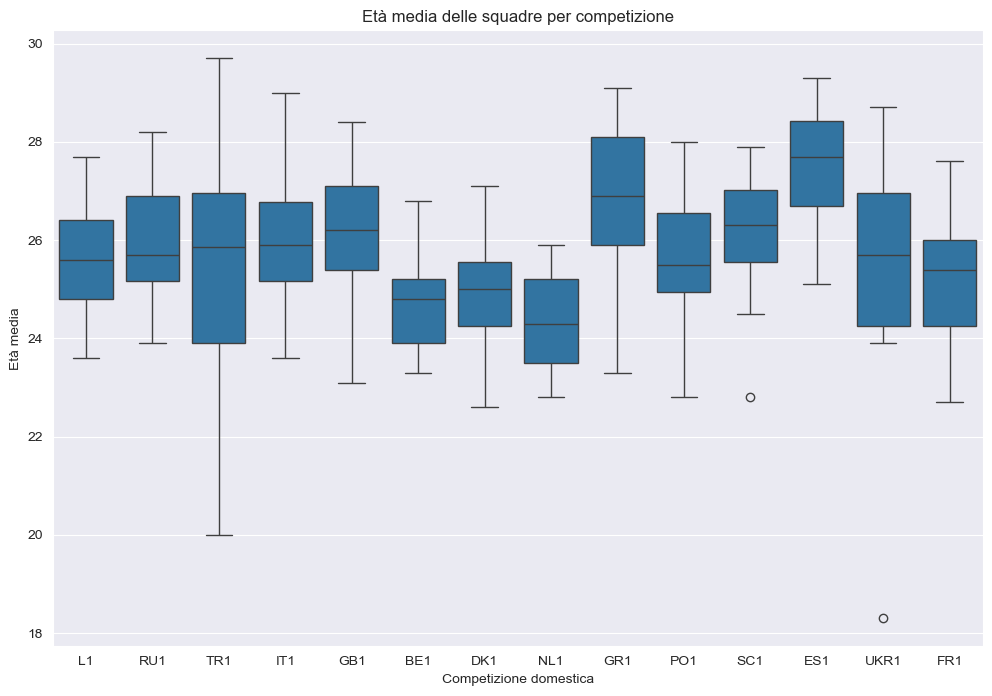

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='domestic_competition_id', y='average_age', data=df[df['average_age'] != -1])
plt.title('Età media delle squadre per competizione')
plt.xlabel('Competizione domestica')
plt.ylabel('Età media')
plt.show()

Subsequently, given the presence of many **numerical values**, a **correlation heatmap** can be useful for identifying the **relationships** between different **numerical variables** in the dataset.
This visualization allows for a quick identification of which variables are strongly **correlated** with each other, either positively or negatively, helping to better understand the **data structure** and to identify any potential **patterns** or **trends**.


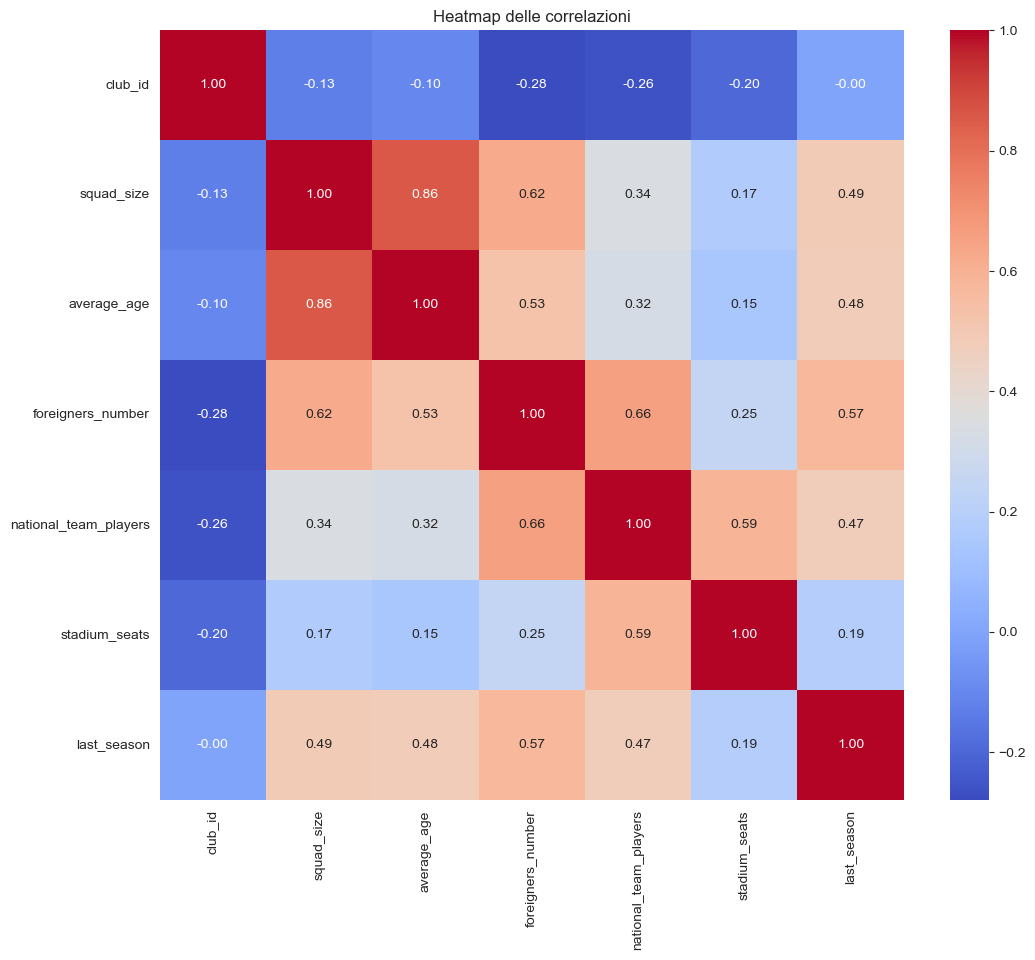

In [10]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Heatmap delle correlazioni')
plt.show() 

Each team is associated with a competition. Using a __bar plot__, we can check which __competitions__ have the __largest__ number of __teams__.


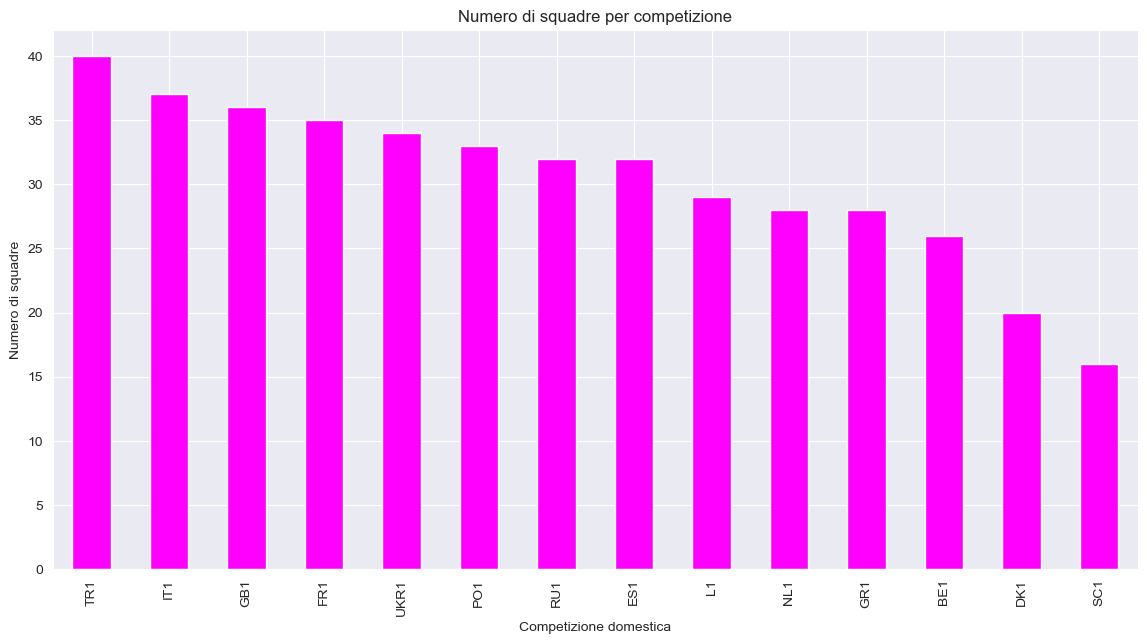

In [11]:
plt.figure(figsize=(14, 7))
df['domestic_competition_id'].value_counts().plot(kind='bar', color='magenta')
plt.title('Numero di squadre per competizione')
plt.xlabel('Competizione domestica')
plt.ylabel('Numero di squadre')
plt.show()

Another interesting variable is **net_transfer_record**, which represents the **net balance** of the club's transfer expenses. The challenge with this variable is that the values are expressed as **strings** rather than **numbers**. The letter **m** denotes millions, while the letter **k** denotes thousands. To convert these values into numbers, we can create a **conversion function** and apply it to the column.


In [12]:
from Utils.ClubUtils import convert_net_transfer_record

df['net_transfer_record_numeric'] = df['net_transfer_record'].apply(convert_net_transfer_record)

df[['net_transfer_record', 'net_transfer_record_numeric']].head(10)

,net_transfer_record,net_transfer_record_numeric
0,€-1.60m,-1600000.0
1,€-770k,-770000.0
2,€-14.50m,-14500000.0
3,+€65.20m,65200000.0
4,€-130.40m,-130400000.0
5,+€2.52m,2520000.0
6,+€335k,335000.0
7,+€9.63m,9630000.0
8,+€1.30m,1300000.0
9,+€778k,778000.0


Now that we have converted the values in the **net_transfer_record** column to numbers, we can visualize the **distribution** of the **net transfer record** using a **line plot**.
Specifically, we will display the **evolution** of the **average net transfer record** over the years.
The **shaded** area around the main "line" represents the **variability** of the data around the estimated mean.


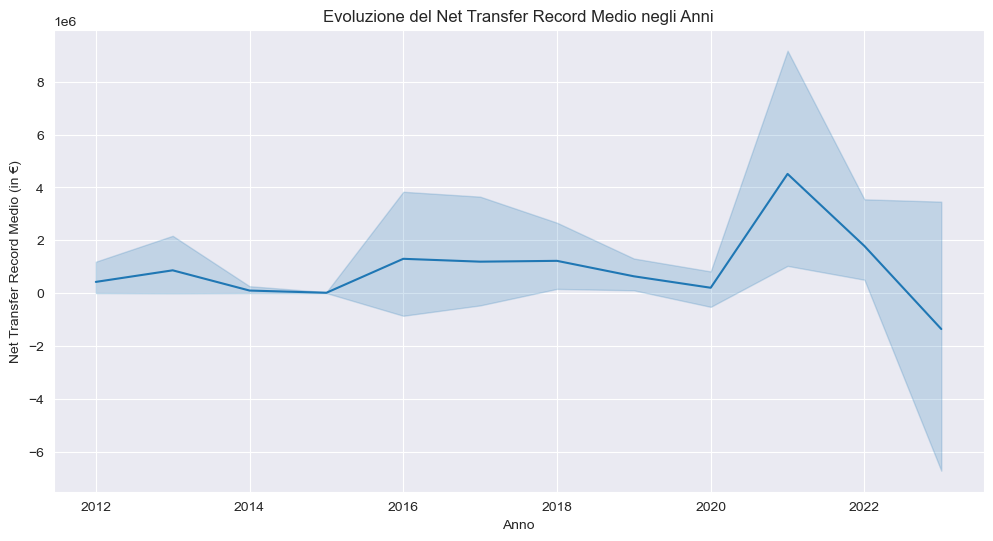

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='last_season', y='net_transfer_record_numeric', estimator='mean')  
plt.title('Evoluzione del Net Transfer Record Medio negli Anni') 
plt.xlabel('Anno') 
plt.ylabel('Net Transfer Record Medio (in €)')
plt.show() 

The dataset contains data on the **number of foreign players** and the **number of national players** for each club. We can use this information to create a graph showing the **distribution** of these two groups within the clubs.
Generate a **scatter plot** with the **number of foreign players** on the x-axis and the **number of national players** on the y-axis.


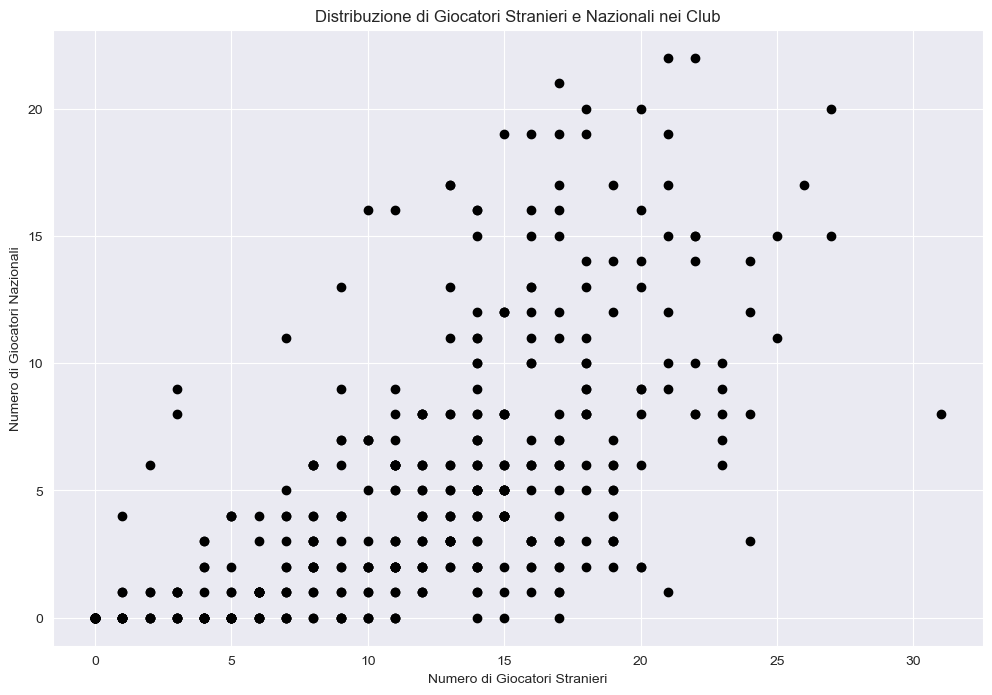

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df['foreigners_number'], df['national_team_players'], color='black')

plt.xlabel('Numero di Giocatori Stranieri')
plt.ylabel('Numero di Giocatori Nazionali')
plt.title('Distribuzione di Giocatori Stranieri e Nazionali nei Club')

plt.grid(True)
plt.show()